In [1]:
from __future__ import print_function, division, absolute_import

import os

%matplotlib inline
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.io.ascii as at
import astropy.io.fits as fits
import astropy.units as u
from scipy.interpolate import interp1d
from cycler import cycler

In [2]:
matplotlib.rc?

In [3]:
matplotlib.rc("axes",prop_cycle=cycler('color',cm.cool(np.linspace(0,1,10))),
             labelsize=20)
matplotlib.rc("font",size=20)

In [4]:
def calc_sn(w,f,v):
    halpha = (w>6555) & (w<6575)
    tio = (w>7000) & (w<7200)

    s2n = f/v

    print("Halpha",np.median(s2n[halpha]),"TiO",np.median(s2n[tio]))

In [5]:
def read_mdm(filename,to_plot=False,get_sn=False,return_header=False):
    with fits.open(filename) as spec:
#             print(spec.info())
#             print(spec[0].data)
        
            flux = spec[0].data[0][0]

            w0 = np.float(spec[0].header["CRVAL1"])
            wi = np.int(spec[0].header["CRPIX1"])
            wstep = np.float(spec[0].header["CD1_1"])
            w00 = (0-wi)*wstep + w0
            lf = len(flux)
            wavelength = np.arange(w00,w00+(lf-1)*wstep,wstep)
            while len(wavelength)<lf:
                wavelength = np.append(wavelength,
                                       wavelength[-1]+wstep)

            var = spec[0].data[3][0]
#             print(len(wavelength), len(flux), len(var))

            print("sec(z) =",spec[0].header["AIRMASS"],
                  "HA =",spec[0].header["HA"])
            
            if to_plot is True:
                plt.figure(figsize=(10,7))
                for i in range(4):
                    plt.plot(wavelength,spec[0].data[i][0],
                             label="row {0}".format(i))
                    plt.yscale("log")
                    plt.ylim(1e-16,1e-12)
                    plt.xlim(6000,8000)
                    plt.legend(loc="best")
                    
            if get_sn is True:
                print(spec[0].header["EXPTIME"])
                calc_sn(wavelength, flux, var)
                
            if return_header is True:
                header = spec[0].header
                
    if return_header is True:
        return wavelength, flux, var, header
    else:
        return wavelength, flux, var

In [6]:
def plot_spec(w,f,v,ax=None,wmin=6500,wmax=7500):
    
    if ax is None:
        plt.figure()
        ax = plt.subplot(111)
    
    wreg = (w<=wmax) & (w>=wmin)
    
    ax.errorbar(w[wreg],f[wreg],v[wreg],capsize=0)

    fmin,fmax = min(f[wreg])*0.99,max(f[wreg])*1.01
    ax.set_ylim(fmin,fmax)
    ax.set_xlim(wmin,wmax)    
    ax.set_xlabel("wavelength")
    ax.set_ylabel("flux")


In [7]:
w,f,v = read_mdm("/Users/stephanie/data/OSMOS/20171104_3.0/finals/trim.J2043+5509.1.fits")

MISFILT                        / MIS Filter Number                               [astropy.io.fits.card]
MISFILT                        / MIS Filter Number                              
MISFLTID                       / MIS Filter ID                                   [astropy.io.fits.card]
MISFLTID                       / MIS Filter ID                                  


sec(z) = 1.17537 HA = +02:03:19


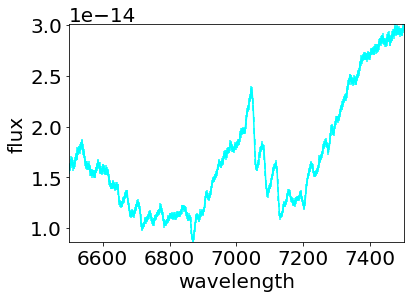

In [8]:
plot_spec(w,f,v)

In [9]:
halpha = (w>6555) & (w<6575)
tio = (w>7000) & (w<7200)

s2n = f/v

print(np.median(s2n[halpha]),np.median(s2n[tio]))

48.97495 60.07238


/Users/stephanie/Dropbox/data/CSCU reductions/20180111/finals/trim.JS706.1.fits
/Users/stephanie/Dropbox/data/CSCU reductions/20180112/finals/trim.JS706.1.fits
sec(z) = 1.03186 HA = -00:32:10
900.0
Halpha 29.024035 TiO 32.295128
sec(z) = 1.025695 HA = -00:16:20
900.0
Halpha 29.297443 TiO 32.91223
sec(z) = 1.087113 HA = -01:27:13
900.0
Halpha 29.864603 TiO 32.53657
sec(z) = 1.065433 HA = -01:11:22
900.0
Halpha 29.858608 TiO 32.410324
sec(z) = 1.205685 HA = -02:21:36
900.0
Halpha 8.399323 TiO 9.537667
sec(z) = 1.163108 HA = -02:05:45
900.0
Halpha 14.903889 TiO 16.89346
sec(z) = 1.122509 HA = -01:47:26
900.0
Halpha 24.116184 TiO 26.026453
sec(z) = 1.093997 HA = -01:31:36
900.0
Halpha 25.443523 TiO 26.780586
sec(z) = 1.094344 HA = -01:30:34
900.0
Halpha 53.175686 TiO 57.390915
sec(z) = 1.071254 HA = -01:14:43
900.0
Halpha 52.04075 TiO 56.24064
sec(z) = 1.27378 HA = -02:41:06
900.0
Halpha 21.699467 TiO 24.089855
sec(z) = 1.220242 HA = -02:25:14
900.0
Halpha 22.985453 TiO 25.945137
sec(z) = 

Text(0.5,1,u'JS706')

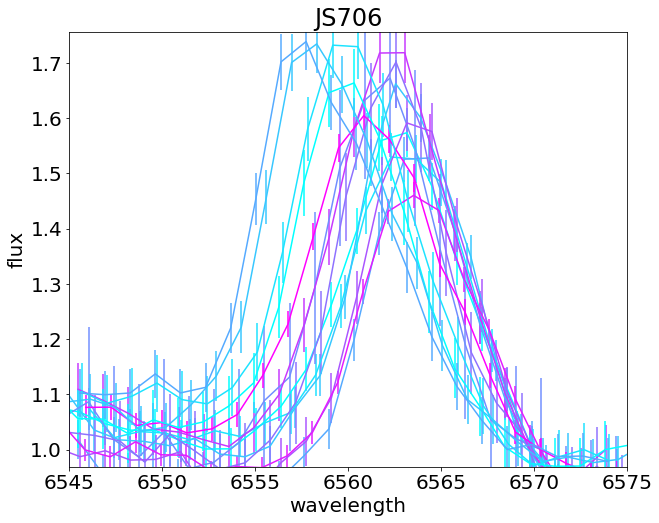

In [10]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

name = "JS706"

for i in range(10):
    fname = "/Users/stephanie/Dropbox/data/CSCU reductions/2018011{0}/finals/trim.{1}.1.fits".format(i+1,name)
    if os.path.exists(fname):
        w,f,v = read_mdm(fname,get_sn=True)
#         plot_spec(w,f,v,ax=ax,wmin=6500,wmax=7250)
        norm_reg = (w>6565) & (w<6575)
        norm_by = np.median(f[norm_reg])
        plot_spec(w,f/norm_by,v/norm_by,ax=ax,wmin=6540,wmax=6580)
        fname = "/Users/stephanie/Dropbox/data/CSCU reductions/2018011{0}/finals/trim.{1}.2.fits".format(i+1,name)
        w,f,v = read_mdm(fname,get_sn=True)
#         plot_spec(w,f,v,ax=ax,wmin=6500,wmax=7250)
        norm_reg = (w>6565) & (w<6575)
        norm_by = np.median(f[norm_reg])
        plot_spec(w,f/norm_by,v/norm_by,ax=ax,wmin=6545,wmax=6575)
    else:
        print(fname)
        
ax.set_title(name)
        
# ax.set_ylim(1e-15,2.5e-14)
    

sec(z) = 1.047111 HA = -00:52:34
900.0
Halpha 99.49479 TiO 122.01814
/Users/stephanie/Dropbox/data/CSCU reductions/20180112/finals/trim.JS455.fits
sec(z) = 1.341199 HA = -02:58:28
780.0
Halpha 107.823135 TiO 129.30865
sec(z) = 1.364859 HA = -03:03:44
600.0
Halpha 91.66378 TiO 109.92116
/Users/stephanie/Dropbox/data/CSCU reductions/20180115/finals/trim.JS455.fits
sec(z) = 1.321877 HA = -02:54:01
600.0
Halpha 78.74914 TiO 94.50028
sec(z) = 1.39493 HA = -03:08:47
600.0
Halpha 150.39275 TiO 180.95569
sec(z) = 1.152222 HA = +02:01:28
600.0
Halpha 81.05556 TiO 98.823875
sec(z) = 1.596219 HA = +03:43:57
600.0
Halpha 64.407906 TiO 79.88376
/Users/stephanie/Dropbox/data/CSCU reductions/201801110/finals/trim.JS455.fits


Text(0.5,1,u'JS455')

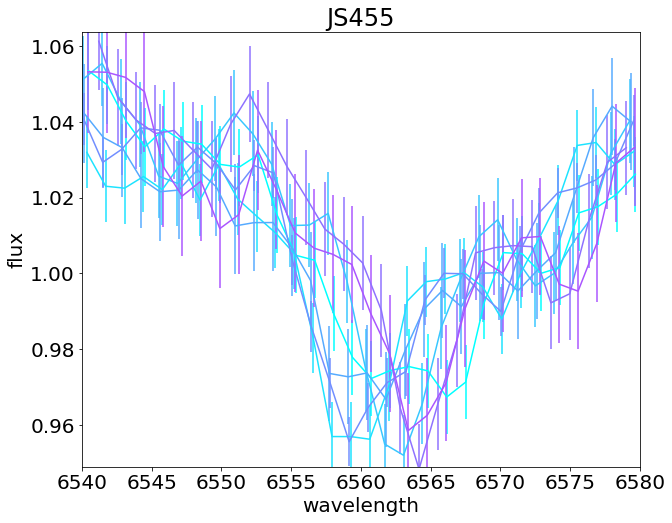

In [17]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

name = "JS455"

for i in range(10):
    fname = "/Users/stephanie/Dropbox/data/CSCU reductions/2018011{0}/finals/trim.{1}.fits".format(i+1,name)
    if os.path.exists(fname):
        w,f,v = read_mdm(fname,get_sn=True)
#         plot_spec(w,f,v,ax=ax,wmin=6500,wmax=7250)
        norm_reg = (w>6565) & (w<6575)
        norm_by = np.median(f[norm_reg])
        plot_spec(w,f/norm_by,v/norm_by,ax=ax,wmin=6540,wmax=6580)
#         fname = "/Users/stephanie/Dropbox/data/CSCU reductions/2018011{0}/finals/trim.{1}.2.fits".format(i+1,name)
#         w,f,v = read_mdm(fname,get_sn=True)
# #         plot_spec(w,f,v,ax=ax,wmin=6500,wmax=7250)
#         norm_reg = (w>6565) & (w<6575)
#         norm_by = np.median(f[norm_reg])
#         plot_spec(w,f/norm_by,v/norm_by,ax=ax,wmin=6545,wmax=6575)
    else:
        print(fname)
        
ax.set_title(name)
        
# ax.set_ylim(1e-15,2.5e-14)
    

/Users/stephanie/Dropbox/data/CSCU reductions/20180111/finals/trim.HSHJ272.1.fits
/Users/stephanie/Dropbox/data/CSCU reductions/20180112/finals/trim.HSHJ272.1.fits
sec(z) = 1.024619 HA = +00:12:58
900.0
Halpha 22.734087 TiO 27.028454
sec(z) = 1.02992 HA = +00:28:49
900.0
Halpha 21.818268 TiO 27.121435
/Users/stephanie/Dropbox/data/CSCU reductions/20180114/finals/trim.HSHJ272.1.fits
sec(z) = 1.029163 HA = +00:27:08
900.0
Halpha 7.448533 TiO 8.9003105
sec(z) = 1.038169 HA = +00:43:01
900.0
Halpha 10.772835 TiO 12.928188
sec(z) = 1.043448 HA = +00:49:59
900.0
Halpha 11.669852 TiO 14.427477
sec(z) = 1.058701 HA = +01:05:50
900.0
Halpha 6.377959 TiO 8.205146
sec(z) = 1.024308 HA = -00:08:48
900.0
Halpha 43.490852 TiO 49.10925
sec(z) = 1.023822 HA = +00:07:02
900.0
Halpha 44.493374 TiO 49.303326
sec(z) = 1.061146 HA = -01:06:43
900.0
Halpha 11.786388 TiO 14.16548
sec(z) = 1.045346 HA = -00:50:51
900.0
Halpha 11.559873 TiO 14.330229
sec(z) = 1.03743 HA = +00:42:36
900.0
Halpha 22.805445 TiO 2

(0.9, 1.5)

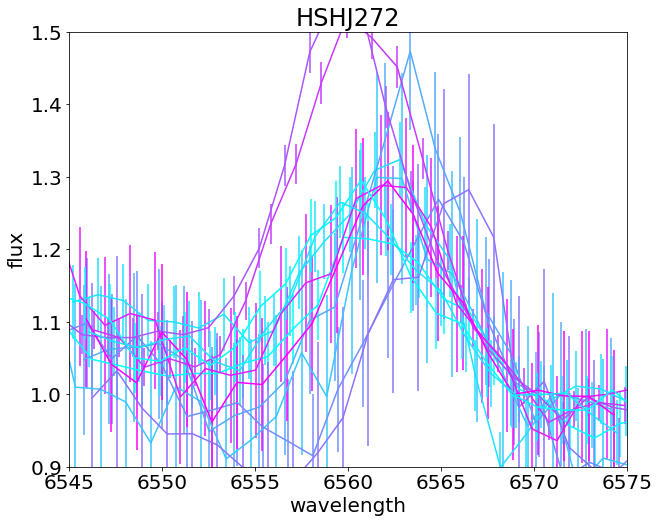

In [11]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)

name = "HSHJ272"

for i in range(10):
    fname = "/Users/stephanie/Dropbox/data/CSCU reductions/2018011{0}/finals/trim.{1}.1.fits".format(i+1,name)
    if os.path.exists(fname):
        w,f,v = read_mdm(fname,get_sn=True)
#         plot_spec(w,f,v,ax=ax,wmin=6500,wmax=7250)
        norm_reg = (w>6565) & (w<6575)
        norm_by = np.median(f[norm_reg])
        plot_spec(w,f/norm_by,v/norm_by,ax=ax,wmin=6540,wmax=6580)
        fname = "/Users/stephanie/Dropbox/data/CSCU reductions/2018011{0}/finals/trim.{1}.2.fits".format(i+1,name)
        w,f,v = read_mdm(fname,get_sn=True)
#         plot_spec(w,f,v,ax=ax,wmin=6500,wmax=7250)
        norm_reg = (w>6565) & (w<6575)
        norm_by = np.median(f[norm_reg])
        plot_spec(w,f/norm_by,v/norm_by,ax=ax,wmin=6545,wmax=6575)
    else:
        print(fname)
        
ax.set_title(name)
        
ax.set_ylim(0.9,1.5)
    

/Users/stephanie/Dropbox/data/CSCU reductions/20180111/finals/trim.HSHJ272.1.fits
/Users/stephanie/Dropbox/data/CSCU reductions/20180112/finals/trim.HSHJ272.1.fits
sec(z) = 1.024619 HA = +00:12:58
900.0
Halpha 22.734087 TiO 27.028454
/Users/stephanie/Dropbox/data/CSCU reductions/20180114/finals/trim.HSHJ272.1.fits
sec(z) = 1.029163 HA = +00:27:08
900.0
Halpha 7.448533 TiO 8.9003105
sec(z) = 1.043448 HA = +00:49:59
900.0
Halpha 11.669852 TiO 14.427477
sec(z) = 1.024308 HA = -00:08:48
900.0
Halpha 43.490852 TiO 49.10925
sec(z) = 1.061146 HA = -01:06:43
900.0
Halpha 11.786388 TiO 14.16548
sec(z) = 1.03743 HA = +00:42:36
900.0
Halpha 22.805445 TiO 26.346796
/Users/stephanie/Dropbox/data/CSCU reductions/201801110/finals/trim.HSHJ272.1.fits


Text(0.5,1,u'HSHJ272')

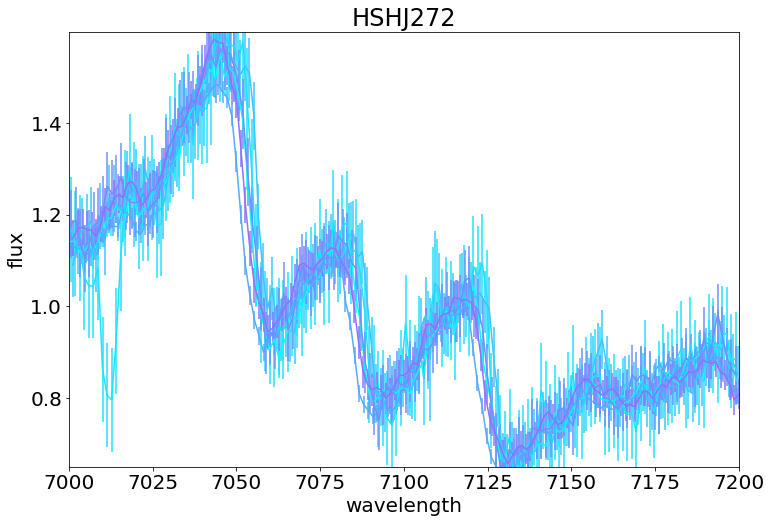

In [38]:
plt.figure(figsize=(12,8))
ax = plt.subplot(111)

name = "HSHJ272"

for i in range(10):
    fname = "/Users/stephanie/Dropbox/data/CSCU reductions/2018011{0}/finals/trim.{1}.1.fits".format(i+1,name)
    if os.path.exists(fname):
        w,f,v = read_mdm(fname,get_sn=True)
#         plot_spec(w,f,v,ax=ax,wmin=6500,wmax=7250)
        norm_reg = (w>7200) & (w<7250)
        norm_by = np.median(f[norm_reg])
        plot_spec(w,f/norm_by,v/norm_by,ax=ax,wmin=7000,wmax=7200)

    else:
        print(fname)
        
ax.set_title(name)
        
# ax.set_ylim(1e-15,2.5e-14)
    

# Run PHEW

In [80]:
import PHEW
reload(PHEW)
from PHEW import EqW
reload(EqW)

<module 'PHEW.EqW' from '/Users/stephanie/code/python/PHEW/EqW.pyc'>

In [45]:
import pyspeckit

In [90]:
fname = "/Users/stephanie/Dropbox/data/CSCU reductions/2018011{0}/finals/trim.{1}.1.fits".format(3,"JS706")
w,f,v,head = read_mdm(fname,get_sn=False,return_header=True)

sp = pyspeckit.Spectrum(fname)
funit = u.erg / u.angstrom / u.second / u.cm**2
sp2 = pyspeckit.Spectrum(xarr=w, data=f, error=v, header=head)

sec(z) = 1.03186 HA = -00:32:10


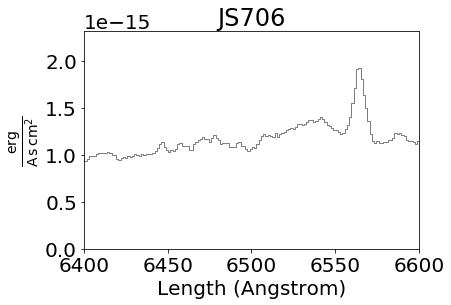

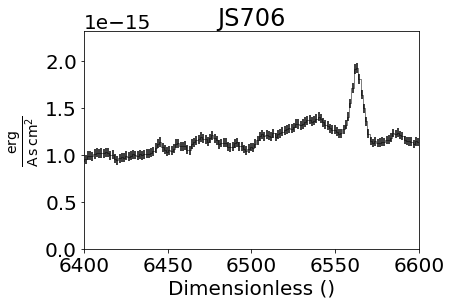

In [91]:
sp.plotter(xmin=6400,xmax=6600,ymin=0,errstyle='bars')
sp2.plotter(xmin=6400,xmax=6600,ymin=0,errstyle='bars')

In [105]:
sp2.specfit.EQW?

INFO:astropy:Renormalizing data by factor 7.527040e-16 to improve fitting procedure


INFO: Renormalizing data by factor 7.527040e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]


-4.833270449440662

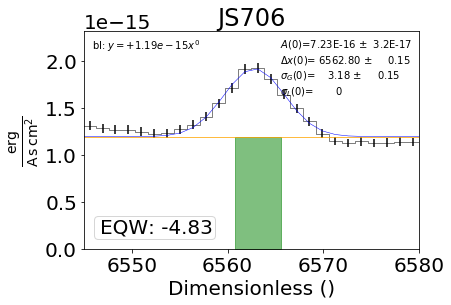

In [117]:
sp2.plotter(xmin=6545,xmax=6580,ymin=0,errstyle='bars')
sp2.baseline(xmin=6545,xmax=6580,exclude=[6555,6570],
                subtract=False, highlight_fitregion=False,
                selectregion=True, order=0)
sp2.specfit(plot=True, fittype='voigt', color='blue',
               guesses='moments', vheight=True)
sp2.specfit.EQW(plot=True, plotcolor='g', fitted=True, components=False,
               annotate=True, loc='lower left', 
                xmin=None, xmax=None#, midpt_location="fitted"
#                 xmin=6540,xmax=6590,xunits="A"
               )

In [131]:
def fit_mdm(fname):
    w,f,v,head = read_mdm(fname,get_sn=False,return_header=True)
#     funit = u.erg / u.angstrom / u.second / u.cm**2
    sp2 = pyspeckit.Spectrum(xarr=w, data=f, error=v, header=head)
    sp2.plotter(xmin=6545,xmax=6580,ymin=0,errstyle='bars')
    sp2.baseline(xmin=6545,xmax=6580,exclude=[6555,6570],
                    subtract=False, highlight_fitregion=False,
                    selectregion=True, order=0)
    sp2.specfit(plot=True, fittype='voigt', color='blue',
                   guesses='moments', vheight=True)
    sp2.specfit.EQW(plot=True, plotcolor='g', fitted=True, components=False,
                   annotate=True, loc='lower left', 
                    xmin=None, xmax=None#, midpt_location="fitted"
    #                 xmin=6540,xmax=6590,xunits="A"
                   )
#     print(sp2.header["HISTORY"])

sec(z) = 1.03186 HA = -00:32:10
INFO

INFO:astropy:Renormalizing data by factor 7.527040e-16 to improve fitting procedure


: Renormalizing data by factor 7.527040e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
01/24/18 15:43:40
01/24/18 15:43:41 SPECFIT: Fitted profile of type voigt
01/24/18 15:43:41 Chi^2: 32.8506  DOF: 22
01/24/18 15:43:41 Param #0   AMPLITUDE0 =  7.23117e-16 +/-     3.16674e-
17
01/24/18 15:43:41 Param #1       SHIFT0 =       6562.8 +/-        0.1525
21
01/24/18 15:43:41 Param #2      GWIDTH0 =      3.18338 +/-        0.1495
15   Range:   [0,inf)
01/24/18 15:43:41 Param #3      LWIDTH0 =            0 +/-
 0   Range:   [0,inf)
01/24/18 15:43:41 EQW for voigt: -4.833270449440662


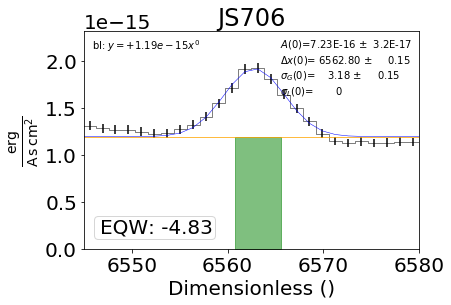

In [129]:
fit_mdm(fname)

/Users/stephanie/Dropbox/data/CSCU reductions/20180111/finals/trim.HSHJ272.1.fits
/Users/stephanie/Dropbox/data/CSCU reductions/20180112/finals/trim.HSHJ272.1.fits
sec(z) = 1.024619 HA = +00:12:58
INFO

INFO:astropy:Renormalizing data by factor 5.763437e-16 to improve fitting procedure


: Renormalizing data by factor 5.763437e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
sec(z) = 1.02992 HA = +00:28:49
INFO

INFO:astropy:Renormalizing data by factor 5.848149e-16 to improve fitting procedure


: Renormalizing data by factor 5.848149e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
/Users/stephanie/Dropbox/data/CSCU reductions/20180114/finals/trim.HSHJ272.1.fits
sec(z) = 1.029163 HA = +00:27:08
INFO

INFO:astropy:Renormalizing data by factor 1.512672e-16 to improve fitting procedure


: Renormalizing data by factor 1.512672e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
sec(z) = 1.038169 HA = +00:43:01
INFO

INFO:astropy:Renormalizing data by factor 1.925097e-16 to improve fitting procedure


: Renormalizing data by factor 1.925097e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
sec(z) = 1.043448 HA = +00:49:59
INFO

INFO:astropy:Renormalizing data by factor 3.796216e-16 to improve fitting procedure


: Renormalizing data by factor 3.796216e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
sec(z) = 1.058701 HA = +01:05:50
INFO

INFO:astropy:Renormalizing data by factor 2.057773e-16 to improve fitting procedure


: Renormalizing data by factor 2.057773e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
sec(z) = 1.024308 HA = -00:08:48
INFO

INFO:astropy:Renormalizing data by factor 7.404219e-16 to improve fitting procedure


: Renormalizing data by factor 7.404219e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
sec(z) = 1.023822 HA = +00:07:02
INFO

INFO:astropy:Renormalizing data by factor 7.763610e-16 to improve fitting procedure


: Renormalizing data by factor 7.763610e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
sec(z) = 1.061146 HA = -01:06:43
INFO

INFO:astropy:Renormalizing data by factor 2.318042e-16 to improve fitting procedure


: Renormalizing data by factor 2.318042e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
sec(z) = 1.045346 HA = -00:50:51
INFO

INFO:astropy:Renormalizing data by factor 2.395312e-16 to improve fitting procedure


: Renormalizing data by factor 2.395312e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
sec(z) = 1.03743 HA = +00:42:36
INFO

INFO:astropy:Renormalizing data by factor 5.171216e-16 to improve fitting procedure


: Renormalizing data by factor 5.171216e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
sec(z) = 1.050332 HA = +00:58:27
INFO

INFO:astropy:Renormalizing data by factor 5.197975e-16 to improve fitting procedure


: Renormalizing data by factor 5.197975e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
/Users/stephanie/Dropbox/data/CSCU reductions/201801110/finals/trim.HSHJ272.1.fits


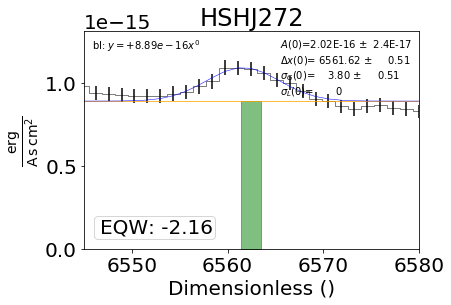

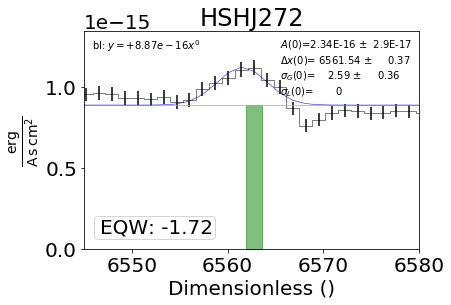

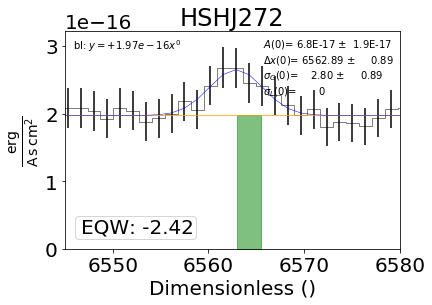

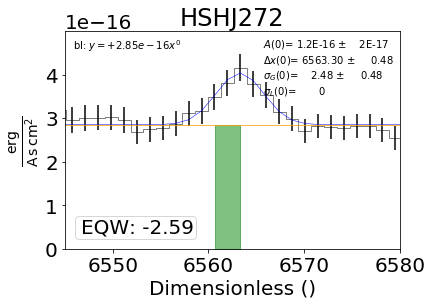

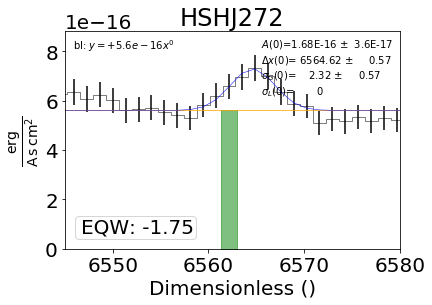

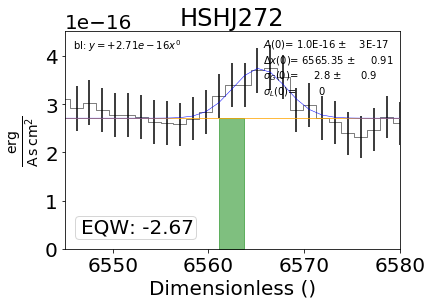

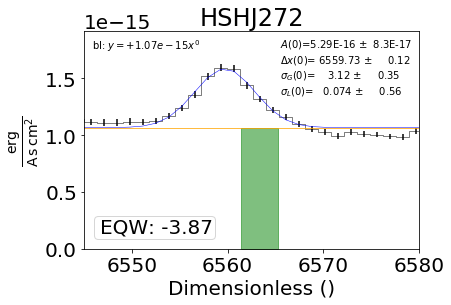

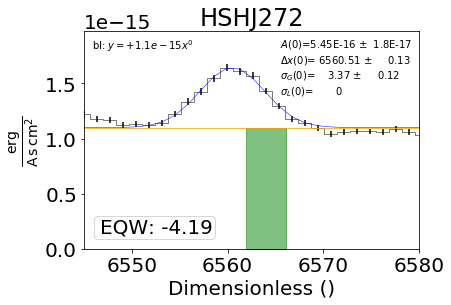

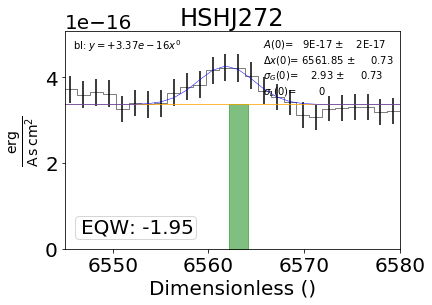

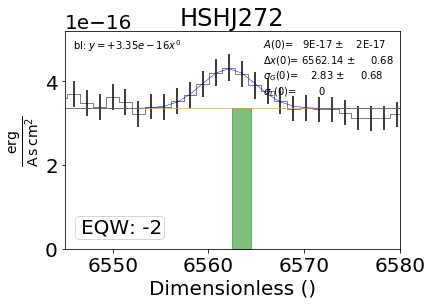

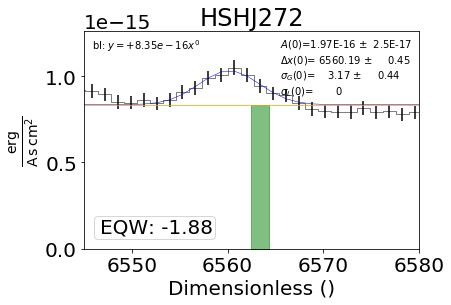

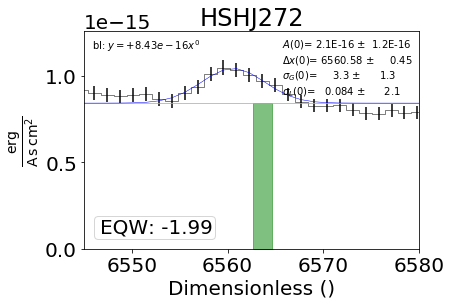

In [132]:
name = "HSHJ272"

for i in range(10):
    fname = "/Users/stephanie/Dropbox/data/CSCU reductions/2018011{0}/finals/trim.{1}.1.fits".format(i+1,name)
    if os.path.exists(fname):
        fit_mdm(fname)    
        fname = "/Users/stephanie/Dropbox/data/CSCU reductions/2018011{0}/finals/trim.{1}.2.fits".format(i+1,name)
        fit_mdm(fname)    
    else:
        print(fname)



Traceback (most recent call last):
  File "/Users/stephanie/anaconda2/lib/python2.7/logging/__init__.py", line 861, in emit
    msg = self.format(record)
  File "/Users/stephanie/anaconda2/lib/python2.7/logging/__init__.py", line 734, in format
    return fmt.format(record)
  File "/Users/stephanie/anaconda2/lib/python2.7/logging/__init__.py", line 465, in format
    record.message = record.getMessage()
  File "/Users/stephanie/anaconda2/lib/python2.7/logging/__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file units.py, line 441
INFO:astropy:Renormalizing data by factor 7.609464e-16 to improve fitting procedure


INFO: Renormalizing data by factor 7.609464e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO

INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure
INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure


: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO

INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure
INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure


: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO

INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure
INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure


: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO

INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure
INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure


: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO

INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure
INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure


: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO

INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure
INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure


: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO

INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure
INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure


: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO

INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure
INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure


: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO

INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure
INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure


: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO

INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure
INFO:astropy:Renormalizing data by factor 7.609465e-16 to improve fitting procedure


: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
INFO: Renormalizing data by factor 7.609465e-16 to improve fitting procedure [pyspeckit.spectrum.fitters]
-37469.37318333441 0.0


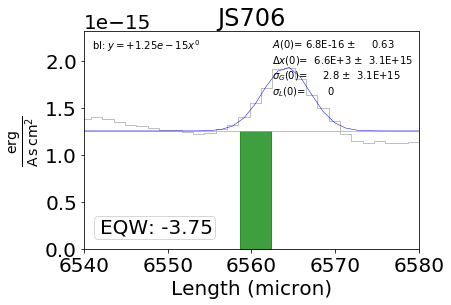

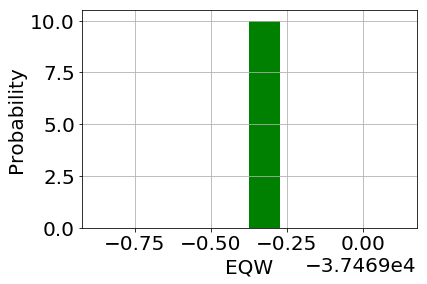

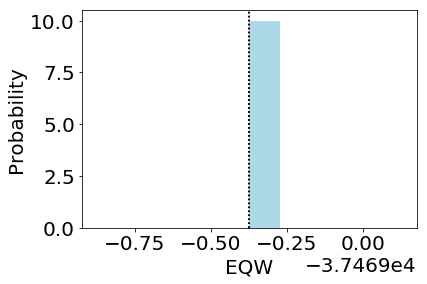

In [81]:
EqW.measure_equivalent_width(fname,6540,6580,6558,6568,10)